BÀI TOÁN NÀY SỬ DỤNG THƯ VIỆN MLXTEND THAY VÌ APYORI VÌ DATASET Ở DẠNG BOOLEAN

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
df=pd.read_csv('/content/market.csv',delimiter=';')
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Bread,Honey,Bacon,Toothpaste,Banana,Apple,Hazelnut,Cheese,Meat,Carrot,...,Milk,Butter,ShavingFoam,Salt,Flour,HeavyCream,Egg,Olive,Shampoo,Sugar
0,1,0,1,0,1,1,1,0,0,1,...,0,0,0,0,0,1,1,0,0,1
1,1,1,1,0,1,1,1,0,0,0,...,1,1,0,0,1,0,0,1,1,0
2,0,1,1,1,1,1,1,1,1,0,...,1,0,1,1,1,1,1,0,0,1
3,1,1,0,1,0,1,0,0,0,0,...,1,0,0,0,1,0,1,1,1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Index(['Bread', 'Honey', 'Bacon', 'Toothpaste', 'Banana', 'Apple', 'Hazelnut',
       'Cheese', 'Meat', 'Carrot', 'Cucumber', 'Onion', 'Milk', 'Butter',
       'ShavingFoam', 'Salt', 'Flour', 'HeavyCream', 'Egg', 'Olive', 'Shampoo',
       'Sugar'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464 entries, 0 to 463
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Bread        464 non-null    int64
 1   Honey        464 non-null    int64
 2   Bacon        464 non-null    int64
 3   Toothpaste   464 non-null    int64
 4   Banana       464 non-null    int64
 5   Apple        464 non-null    int64
 6   Hazelnut     464 non-null    int64
 7   Cheese       464 non-null    int64
 8   Meat         464 non-null    int64
 9   Carrot       464 non-null    int64
 10  Cucumber     464 non-null    int64
 11  Onion        464 non-null    int64
 12  Milk         464 non-null    int64
 13  Butter       464 non-null    int64
 14  ShavingFoam  464 non-null    int64
 15  Salt         464 non-null    int64
 16  Flour        464 non-null    int64
 17  HeavyCream   464 non-null    int64
 18  Egg          464 non-null    int64
 19  Olive        464 non-null    int64
 20  Shampoo   

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
df.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Bread,Honey,Bacon,Toothpaste,Banana,Apple,Hazelnut,Cheese,Meat,Carrot,...,Milk,Butter,ShavingFoam,Salt,Flour,HeavyCream,Egg,Olive,Shampoo,Sugar
count,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,...,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000
mean,0.407328,0.415948,0.431034,0.383621,0.448276,0.405172,0.420259,0.443966,0.387931,0.413793,...,0.370690,0.375000,0.405172,0.398707,0.385776,0.415948,0.403017,0.381466,0.366379,0.366379
std,0.491867,0.493417,0.495755,0.486792,0.497854,0.491455,0.494133,0.497386,0.487805,0.493044,...,0.483511,0.484645,0.491455,0.490161,0.487303,0.493417,0.491034,0.486271,0.482335,0.482335
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Bread          0
Honey          0
Bacon          0
Toothpaste     0
Banana         0
Apple          0
Hazelnut       0
Cheese         0
Meat           0
Carrot         0
Cucumber       0
Onion          0
Milk           0
Butter         0
ShavingFoam    0
Salt           0
Flour          0
HeavyCream     0
Egg            0
Olive          0
Shampoo        0
Sugar          0
dtype: int64

In [ ]:
# check xem item nào được mua nhiều nhất
item_sizes = df.sum().sort_values(ascending=False)
item_sizes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Banana         208
Cheese         206
Bacon          200
Hazelnut       195
HeavyCream     193
Honey          193
Carrot         192
Bread          189
Apple          188
ShavingFoam    188
Egg            187
Salt           185
Meat           180
Flour          179
Toothpaste     178
Olive          177
Cucumber       177
Onion          176
Butter         174
Milk           172
Shampoo        170
Sugar          170
dtype: int64

In [ ]:
#xem tỉ lệ % mua hàng của mỗi item nào nhiều nhất
item_frequency = df.mean() * 100
item_frequency

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Bread          40.732759
Honey          41.594828
Bacon          43.103448
Toothpaste     38.362069
Banana         44.827586
Apple          40.517241
Hazelnut       42.025862
Cheese         44.396552
Meat           38.793103
Carrot         41.379310
Cucumber       38.146552
Onion          37.931034
Milk           37.068966
Butter         37.500000
ShavingFoam    40.517241
Salt           39.870690
Flour          38.577586
HeavyCream     41.594828
Egg            40.301724
Olive          38.146552
Shampoo        36.637931
Sugar          36.637931
dtype: float64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



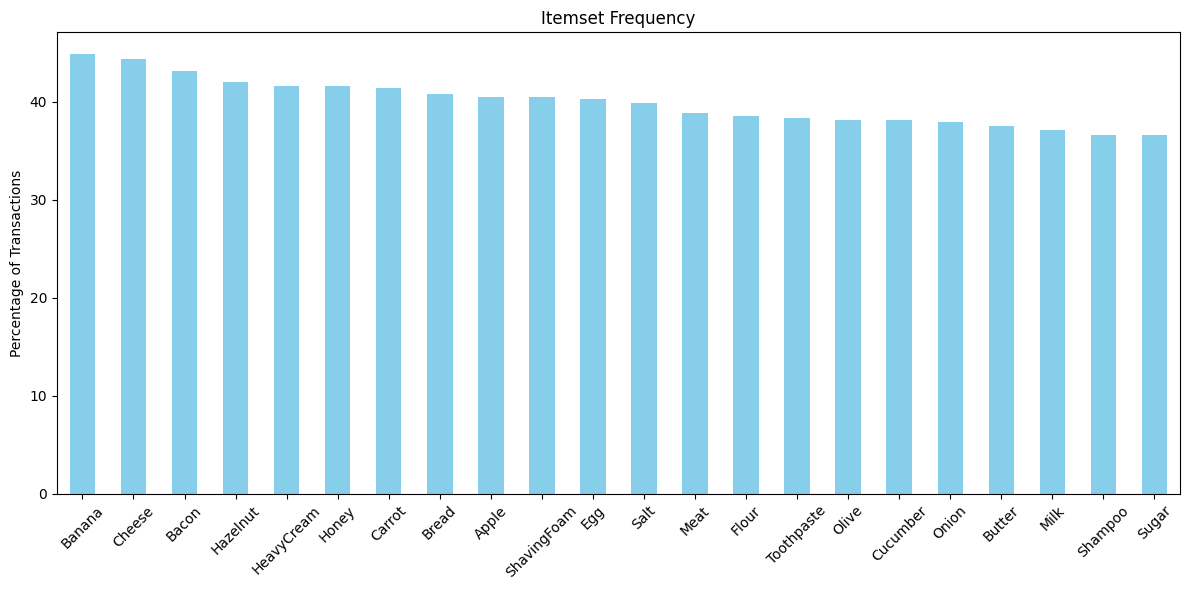

In [ ]:
# Plot tỉ lệ % mua hàng của mỗi item
plt.figure(figsize=(12, 6))
item_frequency.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Itemset Frequency')
plt.ylabel('Percentage of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Xem ở mỗi transactions sẽ có tổng số lượng bao nhiêu items
itemset_sizes = df.sum(axis=1).sort_values(ascending=False)
itemset_sizes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



2      17
217    17
399    17
373    16
445    16
       ..
252     1
433     1
257     1
332     1
240     1
Length: 464, dtype: int64

In [ ]:
histogram_data = pd.DataFrame({'Itemset Size': itemset_sizes})
histogram_data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Itemset Size
2,17
217,17
399,17
373,16
445,16
...,...
252,1
433,1
257,1
332,1


In [ ]:
# plot lên histogram để xem rằng các đơn hàng mua với tổng số lượng item nằm ở tổng số lượng item bao nhiêu là nhiều đơn nhất
fig = px.histogram(histogram_data, x='Itemset Size', nbins=max(itemset_sizes), labels={'Itemset Size': 'Number of Items in Transaction'})
fig.update_layout(
    title='Itemset Size Distribution',
    xaxis_title='Number of Items in Transaction',
    yaxis_title='Frequency',
    xaxis=dict(showline=True, showgrid=False),
    yaxis=dict(showline=True, showgrid=True, gridwidth=0.5, gridcolor='lightgray'),
    bargap=0.05  # Adjust the gap between bars
)

fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning:

np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



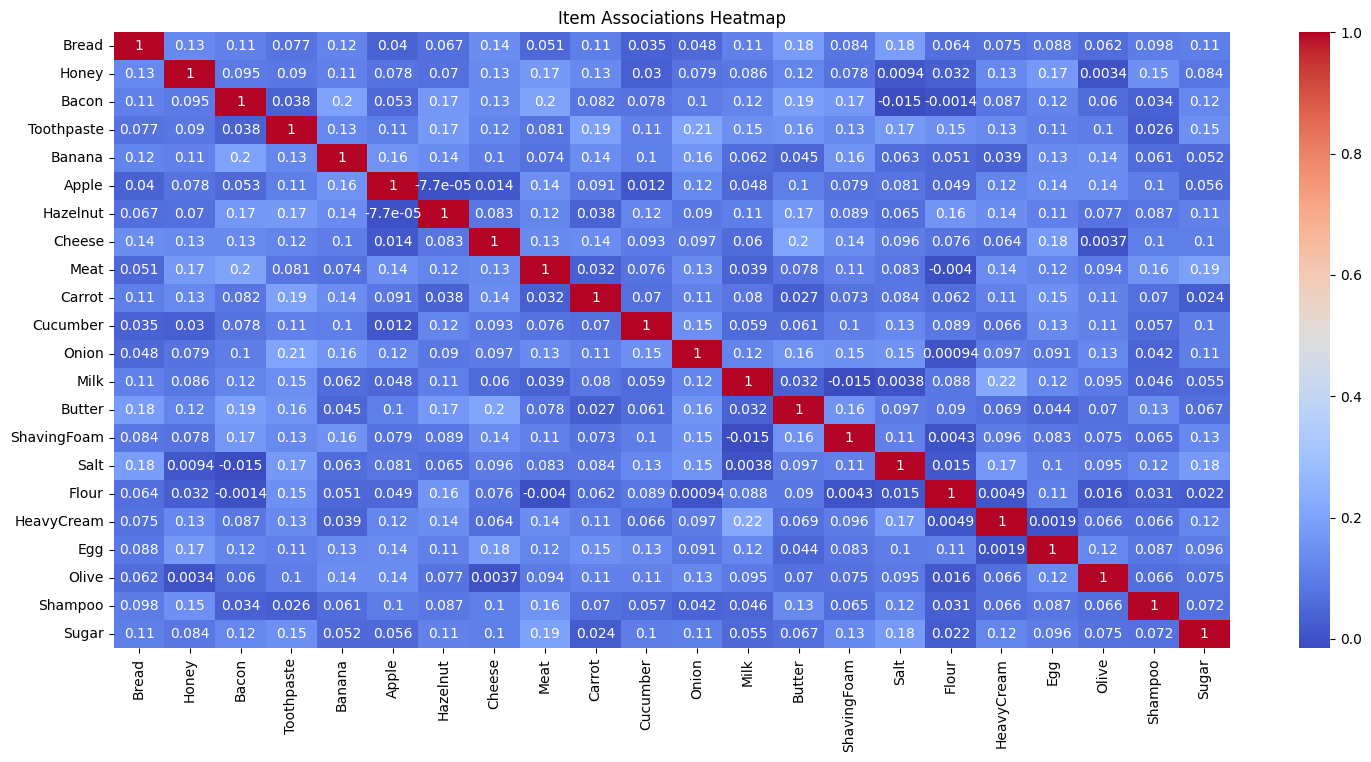

In [ ]:
# Create a correlation heatmap to visualize item associations
item_associations = df.corr()
plt.figure(figsize=(18, 8))
sns.heatmap(item_associations, cmap='coolwarm', annot=True)
plt.title('Item Associations Heatmap')
plt.show()

In [ ]:
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Bread,Honey,Bacon,Toothpaste,Banana,Apple,Hazelnut,Cheese,Meat,Carrot,...,Milk,Butter,ShavingFoam,Salt,Flour,HeavyCream,Egg,Olive,Shampoo,Sugar
0,1,0,1,0,1,1,1,0,0,1,...,0,0,0,0,0,1,1,0,0,1
1,1,1,1,0,1,1,1,0,0,0,...,1,1,0,0,1,0,0,1,1,0
2,0,1,1,1,1,1,1,1,1,0,...,1,0,1,1,1,1,1,0,0,1
3,1,1,0,1,0,1,0,0,0,0,...,1,0,0,0,1,0,1,1,1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,0,1,1,0,0,1,1,1,1,1,...,1,1,0,0,1,1,1,1,1,0
460,0,0,1,0,0,0,1,0,1,0,...,0,0,1,0,0,0,1,0,0,1
461,0,0,0,0,0,1,0,1,1,0,...,1,0,0,0,0,0,1,0,0,0
462,1,0,0,1,1,0,1,1,0,1,...,1,0,0,0,1,0,1,1,0,1


Tính ra mức độ mua hàng thường xuyên của các mặt hàng, set min_support=0.2 cho code chạy mức độ thường xuyên mua hàng của khách hàng đối với mặt hàng đó phải trên 20%

In [ ]:
frequently_bought = apriori(df, min_support=0.2, use_colnames=True, verbose=1)
print(f"The number of frequently purchased items is: {len(frequently_bought)}")
frequently_bought


Processing 1014 combinations | Sampling itemset size 3
The number of frequently purchased items is: 66


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



,support,itemsets
0,0.407328,(Bread)
1,0.415948,(Honey)
2,0.431034,(Bacon)
3,0.383621,(Toothpaste)
4,0.448276,(Banana)
...,...,...
61,0.200431,"(HeavyCream, Cheese)"
62,0.221983,"(Egg, Cheese)"
63,0.202586,"(Carrot, Egg)"
64,0.206897,"(HeavyCream, Milk)"


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



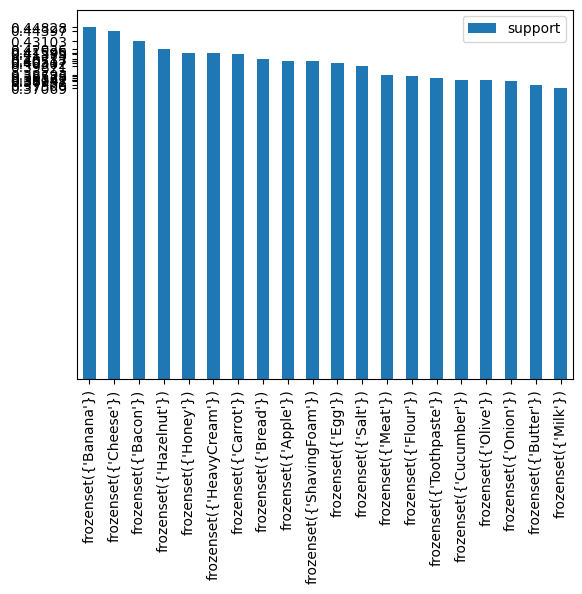

Text(0.5, 1.0, 'Percent_bought_of_items')

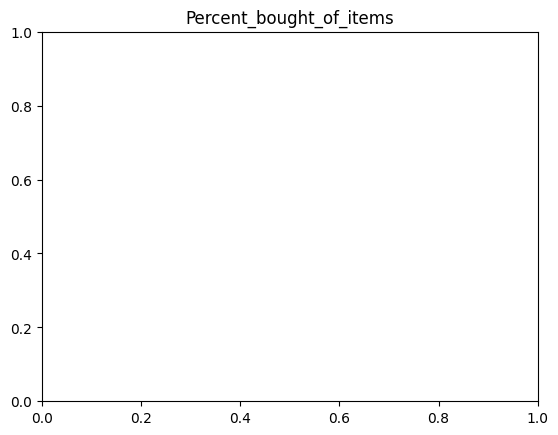

In [ ]:
top_20_items_bought=frequently_bought.sort_values(by='support',ascending=False).reset_index().head(20)
top_20_items_bought= top_20_items_bought.drop(columns='index')
top_20_items_bought.plot(kind='bar')
plt.xticks(top_20_items_bought.index,top_20_items_bought['itemsets'])
plt.yticks(top_20_items_bought['support'])
plt.show()
plt.title('Percent_bought_of_items')

antecedent: mặt hàng khách hàng mua đầu tiên. consequent: mặt hàng khách hàng mua tiếp sau khi họ mua antecedents
antecedent support: đo lường số lần khách hàng mua mặt hàng antecedents xuất hiện trong toàn bộ dữ liệu giao dịch
consequnet support: đo lường số lần khách hàng mua mặt hàng consequents xuất hiện trong toàn bộ dữ liệu giao dịch
support: mức độ mua hàng thường của khách hàng đối với mỗi cặp antecedents và consequents. ví dụ hàng 0 có support= 0.211207-> 21,12% cặp bread và banana sẽ được khách hàng mua khi ghé cửa hàng
confidence: mức độ tin cậy đo lường. Ví dụ hàng thứ 0 có cặp bread và banana thì cofidence= 0.518519 -> khách hàng mua bread thì 51,85% họ sẽ mua banana

In [ ]:
rules = association_rules(frequently_bought, metric = "confidence", min_threshold = 0.5)
print(f"The number of rules = {len(rules)}")
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



The number of rules = 45


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Bread),(Banana),0.407328,0.448276,0.211207,0.518519,1.156695,0.028612,1.145889,0.228571
1,(Bread),(Cheese),0.407328,0.443966,0.215517,0.529101,1.191760,0.034678,1.180792,0.271491
2,(Bread),(Salt),0.407328,0.398707,0.206897,0.507937,1.273960,0.044492,1.221983,0.362841
3,(Salt),(Bread),0.398707,0.407328,0.206897,0.518919,1.273960,0.044492,1.231960,0.357639
4,(Honey),(Banana),0.415948,0.448276,0.213362,0.512953,1.144281,0.026902,1.132795,0.215886
5,(Honey),(Cheese),0.415948,0.443966,0.217672,0.523316,1.178731,0.033006,1.166464,0.259618
6,(Meat),(Honey),0.387931,0.415948,0.202586,0.522222,1.255498,0.041227,1.222434,0.332484
7,(Honey),(Egg),0.415948,0.403017,0.209052,0.502591,1.247070,0.041417,1.200184,0.339217
8,(Egg),(Honey),0.403017,0.415948,0.209052,0.518717,1.247070,0.041417,1.213530,0.331869
9,(Banana),(Bacon),0.448276,0.431034,0.241379,0.538462,1.249231,0.048157,1.232759,0.361607


In [ ]:
rules.to_csv('rules.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Đọc dữ liệu từ tập tin CSV
new_df= pd.read_csv('/content/rules (1).csv')
new_df=new_df.drop(columns='Unnamed: 0')
new_df.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,Bread,Banana,0.407328,0.448276,0.211207,0.518519,1.156695,0.028612,1.145889,0.228571
1,Bread,Cheese,0.407328,0.443966,0.215517,0.529101,1.191760,0.034678,1.180792,0.271491
2,Bread,Salt,0.407328,0.398707,0.206897,0.507937,1.273960,0.044492,1.221983,0.362841
3,Salt,Bread,0.398707,0.407328,0.206897,0.518919,1.273960,0.044492,1.231960,0.357639
4,Honey,Banana,0.415948,0.448276,0.213362,0.512953,1.144281,0.026902,1.132795,0.215886


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning:

np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)



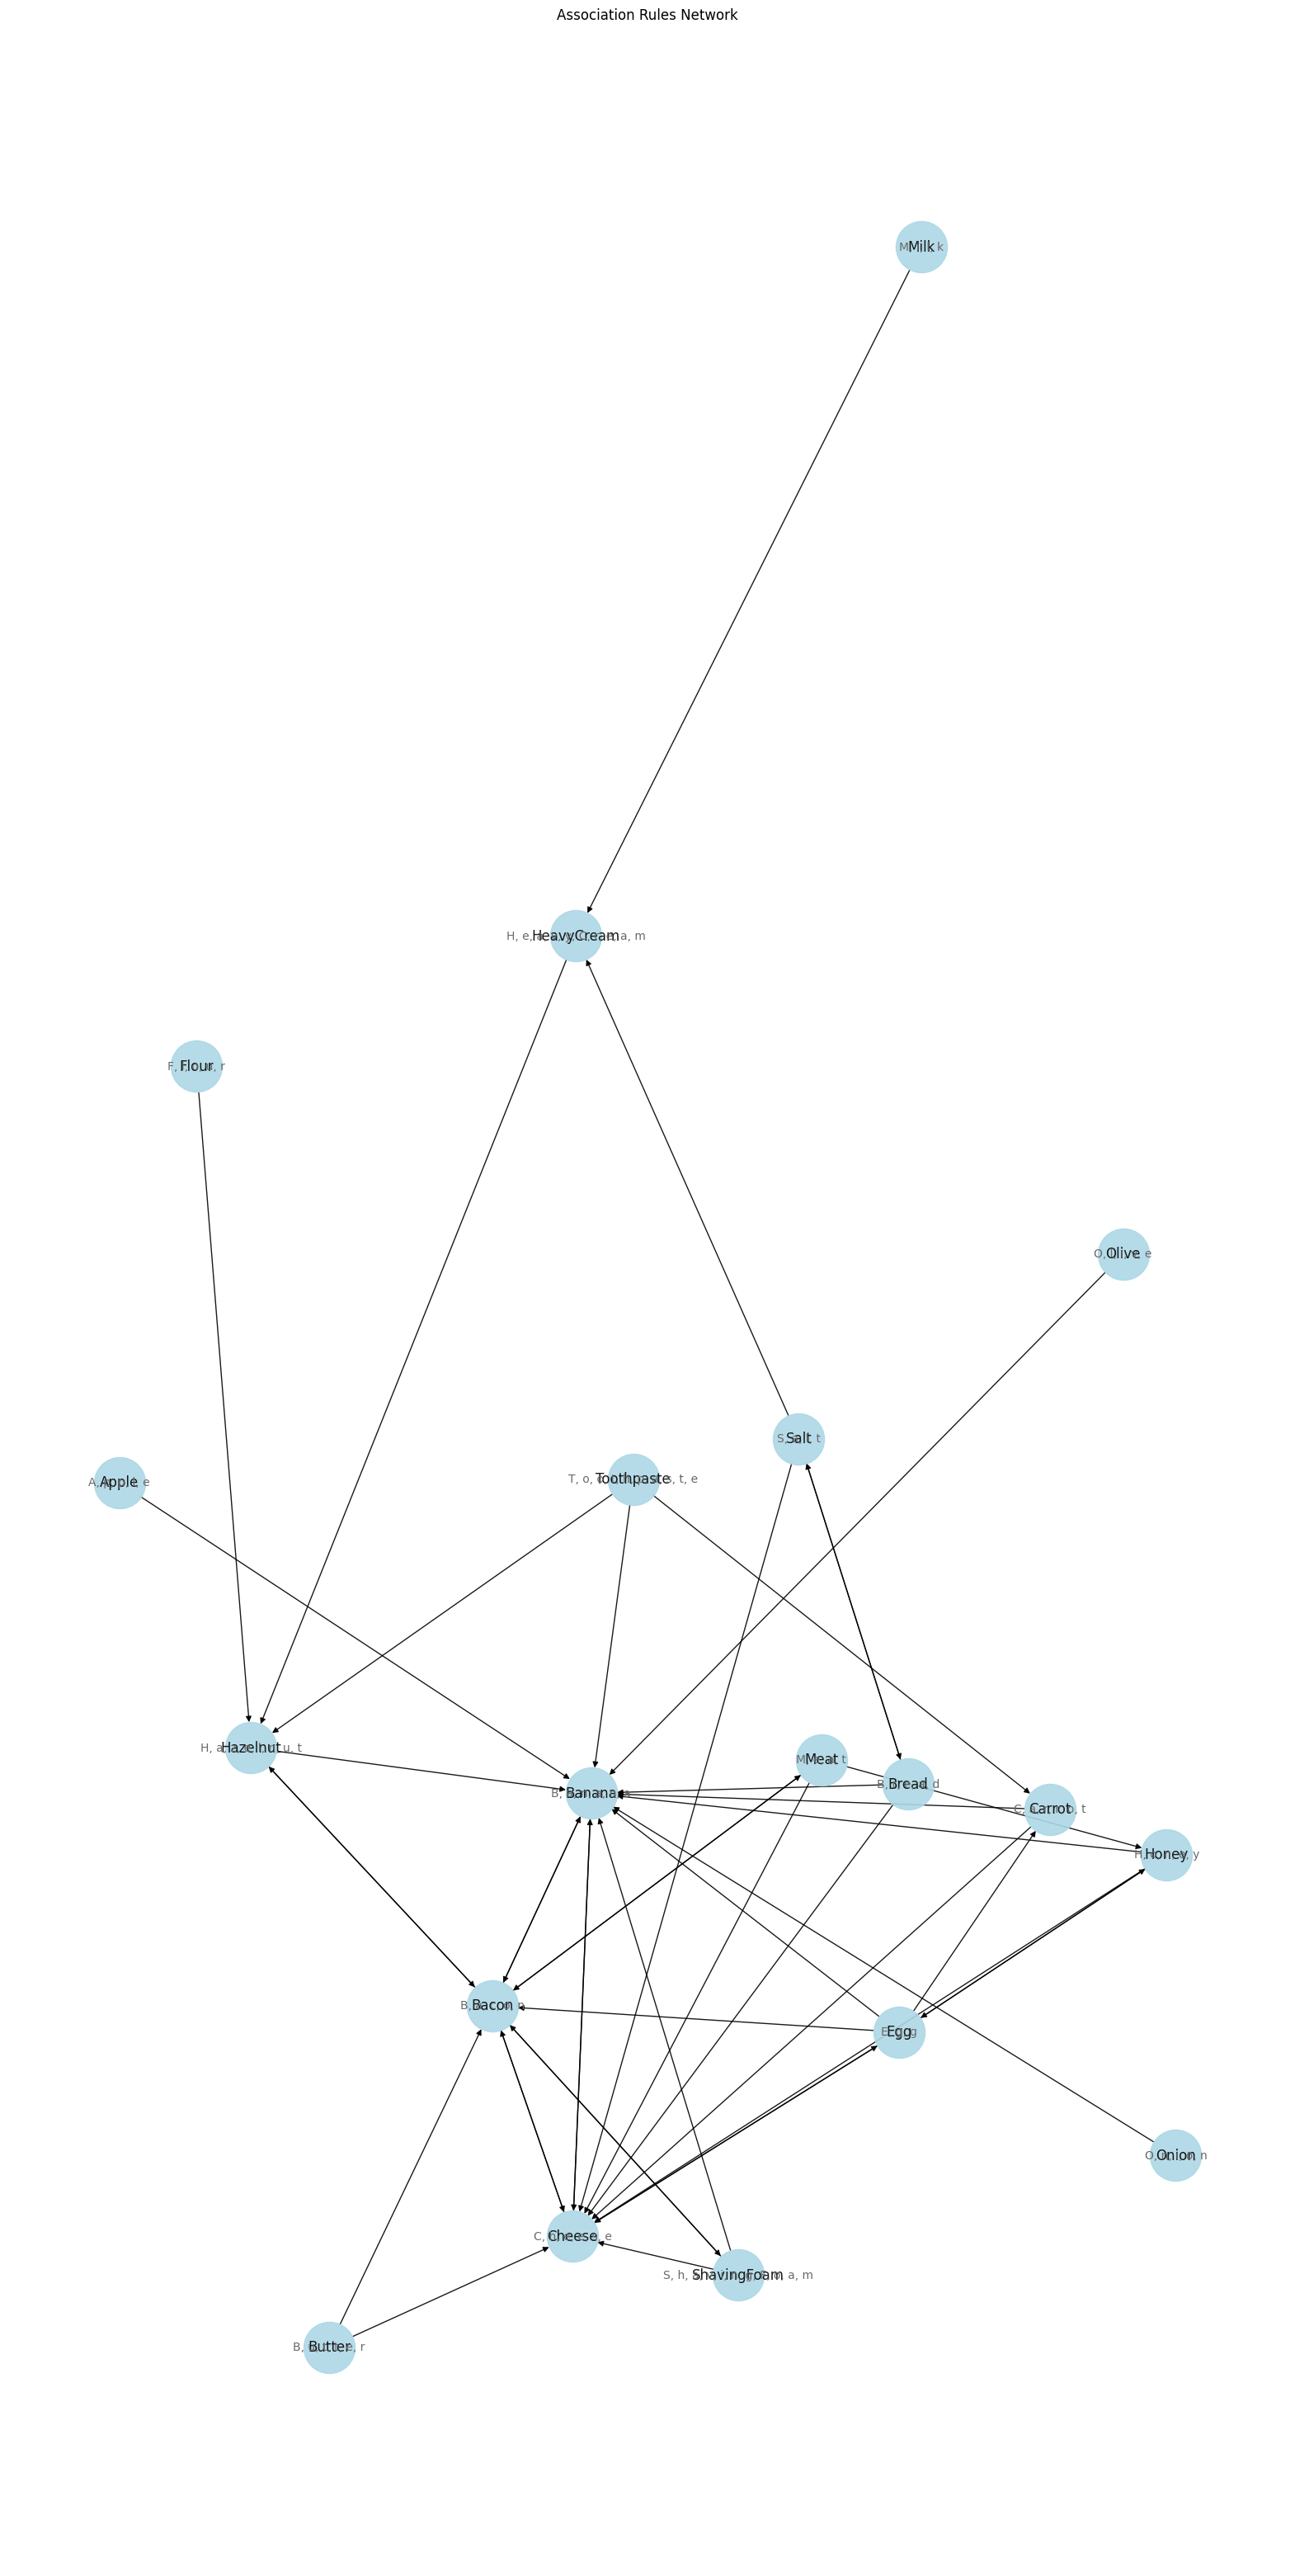

In [ ]:
# Tạo một đồ thị trống
G = nx.DiGraph()

# Thêm các cạnh vào đồ thị dựa trên dữ liệu từ tập tin CSV
for _,row in new_df.iterrows():
    antecedents = row['antecedents']
    consequents = row['consequents']
    confidence = row['confidence']
    G.add_edge(antecedents, consequents, confidence=confidence)


# Vẽ đồ thị
pos = nx.spring_layout(G, seed=42)  # Xác định vị trí các đỉnh
labels = {node: ', '.join(node) for node in G.nodes()}  # Nhãn cho các đỉnh

plt.figure(figsize=(20, 40))
nx.draw_networkx(G, pos, with_labels=True, node_size=2000, node_color='lightblue', alpha=0.9)
nx.draw_networkx_labels(G, pos, labels, font_size=10, font_color='dimgrey')
edge_labels = nx.get_edge_attributes(G, 'support')
nx.draw_networkx_edge_labels(G, pos, edge_labels, font_color='darkslategrey')
plt.title('Association Rules Network')
plt.axis('off')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning:

np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)

/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning:

np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)

/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: Dep

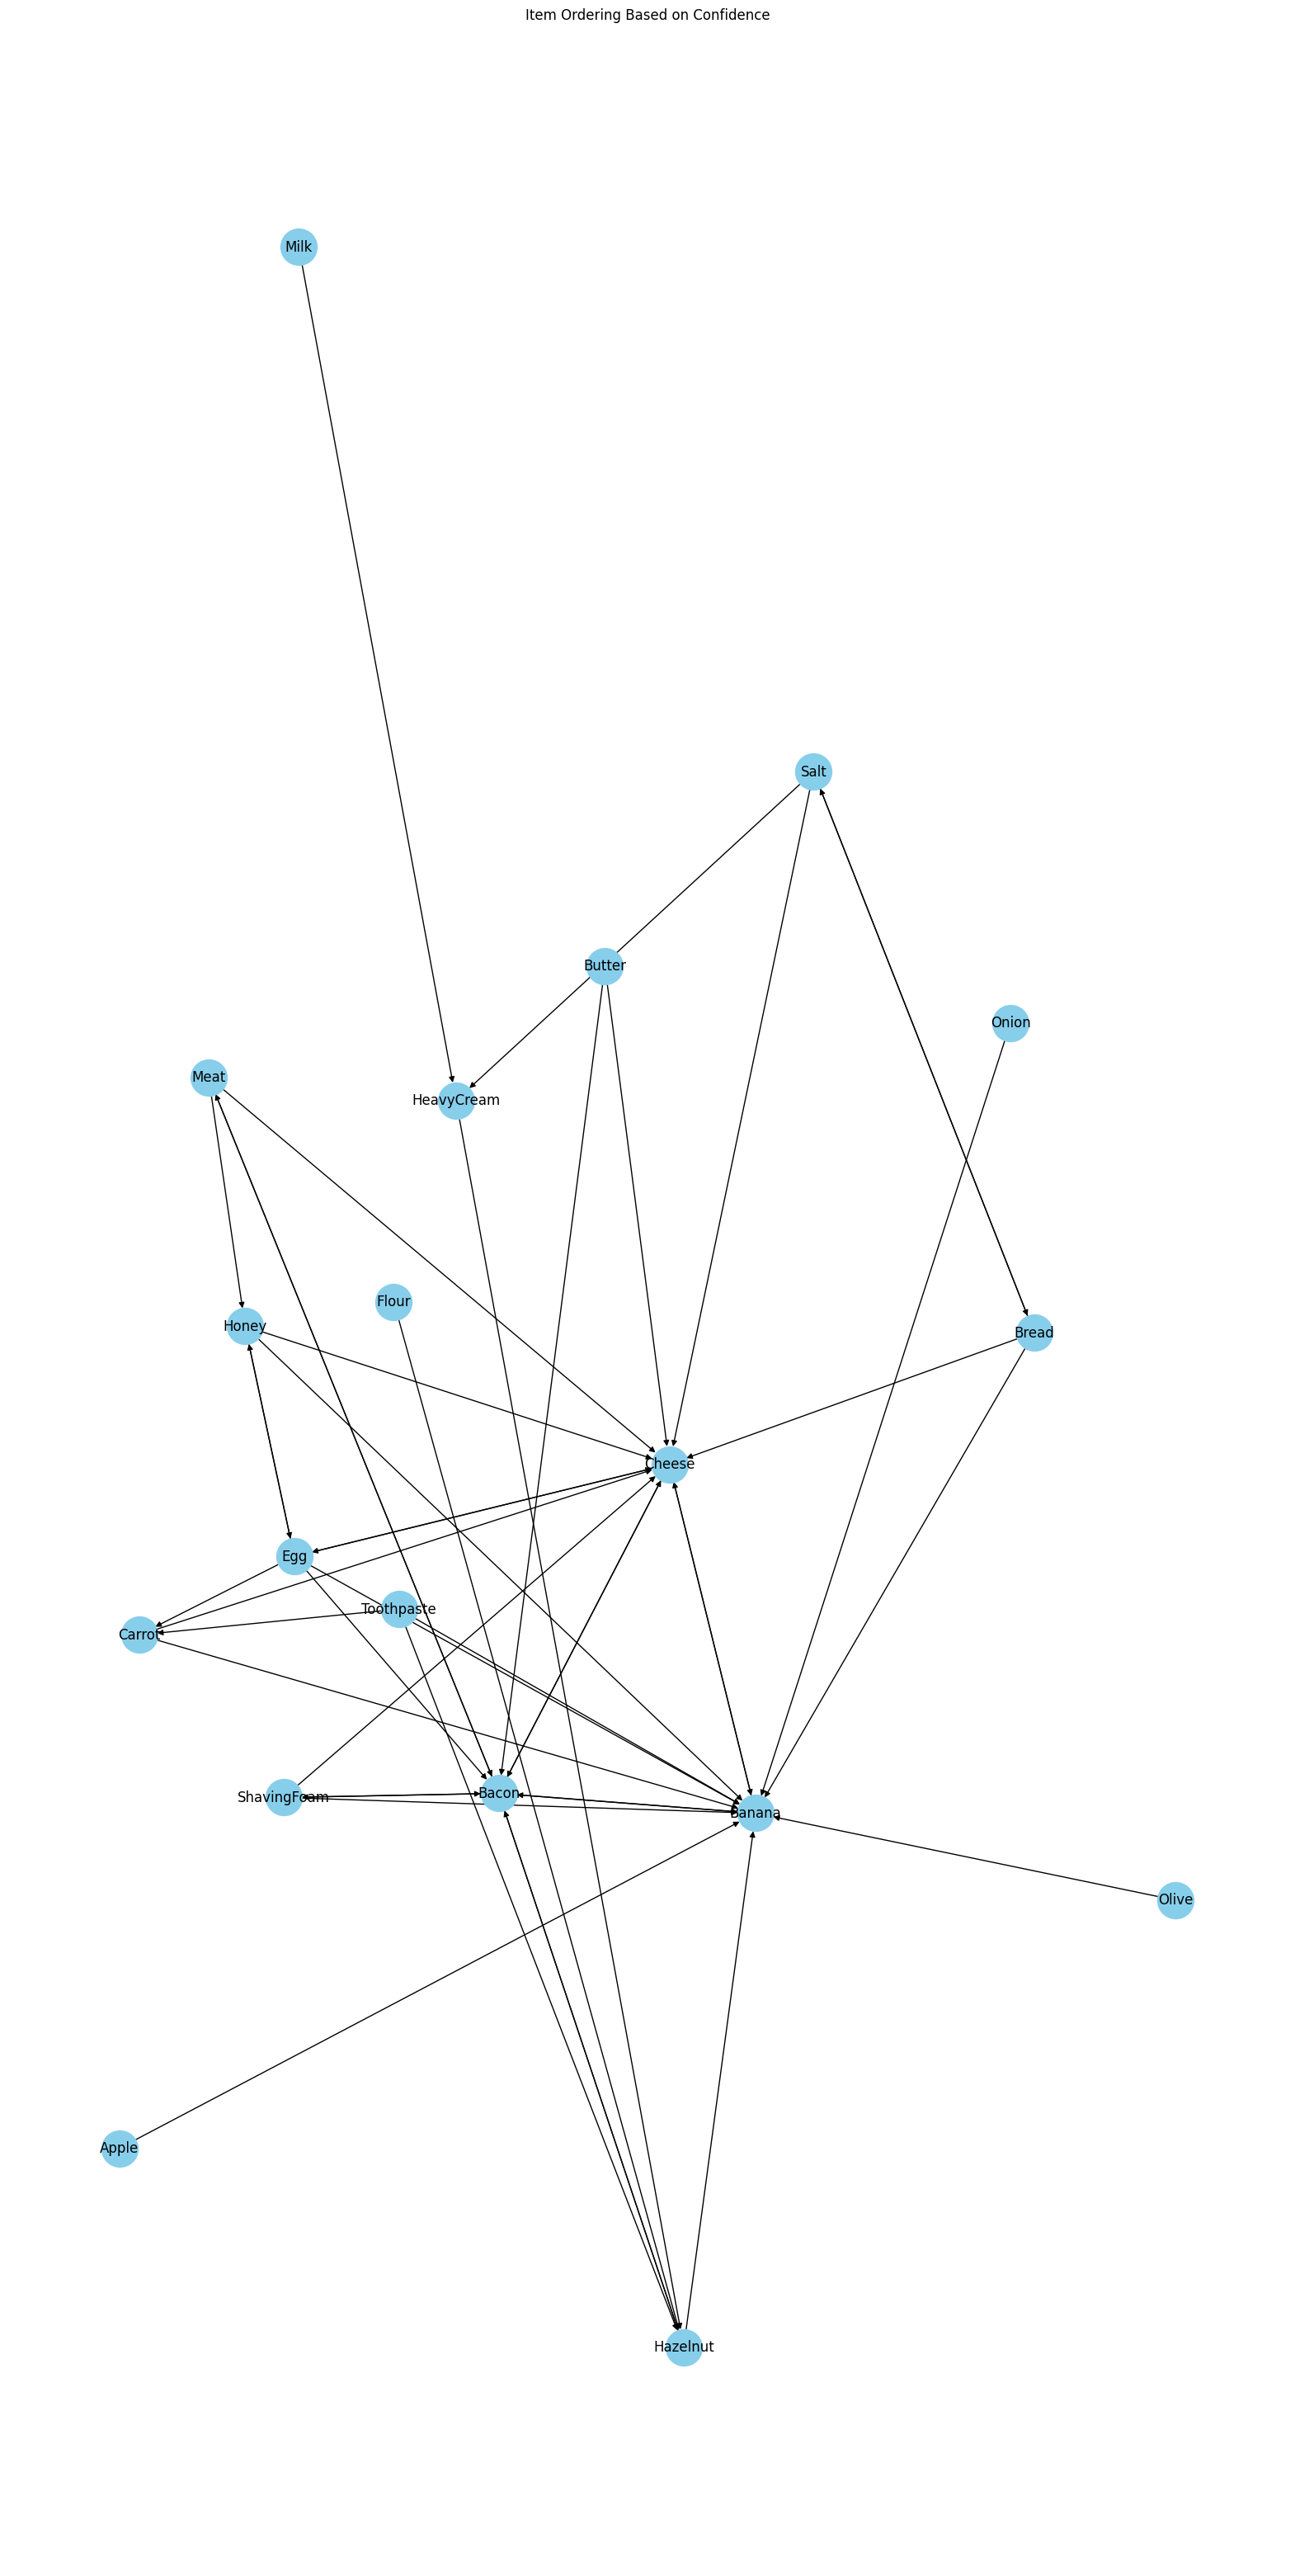

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Đọc dữ liệu từ tệp rules.csv
data = pd.read_csv('/content/rules (1).csv')

# Tạo đồ thị
G = nx.DiGraph()

# Thêm các đỉnh (nodes) vào đồ thị
for i in range(len(data)):
    antecedents = data.iloc[i]['antecedents']
    consequents = data.iloc[i]['consequents']
    G.add_node(antecedents)
    G.add_node(consequents)

# Thêm các cạnh (edges) vào đồ thị với trọng số là confidence
for i in range(len(data)):
    antecedents = data.iloc[i]['antecedents']
    consequents = data.iloc[i]['consequents']
    confidence = data.iloc[i]['confidence']
    G.add_edge(antecedents, consequents, weight=confidence)

# Vẽ đồ thị
plt.figure(figsize=(20, 40))
pos = nx.spring_layout(G)  # Vị trí các đỉnh
nx.draw_networkx(G, pos, with_labels=True, node_size=1000, node_color='skyblue')
# Nhãn cạnh là trọng số
#edge_labels = nx.get_edge_attributes(G, 'weight')
#nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title('Item Ordering Based on Confidence')
plt.axis('off')
plt.show()
